# ECE 659 Project 

Title: Landslide Prediction using Deep-Learning Frameworks and WSN 

Group 12:

Shreya Reddy Bobbiti

Hardik Gossain 

Aswathy Baladhandapani 


### Search for dataset
analysis of NASA dataset to understand the global span of landslides.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
!ls


Global_Landslide_Catalog_Export.csv landslide_detection.ipynb
TrainData                           model_save.h5
Unet.py                             test
__pycache__                         utils.py
best_model.h5                       validation


In [5]:
nasa_data = pd.read_csv('Global_Landslide_Catalog_Export.csv')

The nasa landslide dataset contains the information of over 11k landslides that occured and these are explained by 31 features (such as event time, place, coordinates etc...) each.

In [6]:
nasa_data.shape

(11033, 31)

In [7]:
nasa_data.describe()

,event_id,event_time,fatality_count,injury_count,event_import_id,admin_division_population,gazeteer_distance,longitude,latitude
count,11033.000000,0.0,9648.000000,5359.000000,9471.000000,9.471000e+03,9471.000000,11033.000000,11033.000000
mean,5598.953141,NaN,3.219424,0.751819,4798.563070,1.577600e+05,11.873689,2.520441,25.881887
std,3249.228647,NaN,59.886178,8.458955,2789.125559,8.297345e+05,15.598228,100.908393,20.415054
min,1.000000,NaN,0.000000,0.000000,-111.167300,0.000000e+00,0.000030,-179.980766,-46.774800
25%,2785.000000,NaN,0.000000,0.000000,2386.500000,1.963000e+03,2.363845,-107.871700,13.917600
50%,5563.000000,NaN,0.000000,0.000000,4773.000000,7.365000e+03,6.254870,19.694600,30.534500
75%,8435.000000,NaN,1.000000,0.000000,7189.500000,3.402100e+04,15.815610,93.948000,40.866259
max,11221.000000,NaN,5000.000000,374.000000,9669.000000,1.269184e+07,215.448880,179.991364,72.627500


In [8]:
nasa_data.isna().sum()

source_name                      0
source_link                    846
event_id                         0
event_date                       0
event_time                   11033
event_title                      0
event_description              862
location_description           102
location_accuracy                2
landslide_category               1
landslide_trigger               23
landslide_size                   9
landslide_setting               69
fatality_count                1385
injury_count                  5674
storm_name                   10456
photo_link                    9537
notes                        10716
event_import_source           1563
event_import_id               1562
country_name                  1562
country_code                  1564
admin_division_name           1637
admin_division_population     1562
gazeteer_closest_point        1563
gazeteer_distance             1562
submitted_date                  10
created_date                     1
last_edited_date    

preliminary analysis of this dataset shows that there are some missing values in many features of the dataset but the important features that are required to accurately check the landslide occurance such as longitude, latitude and date do ot have any missing data.

In [9]:
# Loading columns of our dataset into a variable
columns = [nasa_data.columns]
columns

[Index(['source_name', 'source_link', 'event_id', 'event_date', 'event_time',
        'event_title', 'event_description', 'location_description',
        'location_accuracy', 'landslide_category', 'landslide_trigger',
        'landslide_size', 'landslide_setting', 'fatality_count', 'injury_count',
        'storm_name', 'photo_link', 'notes', 'event_import_source',
        'event_import_id', 'country_name', 'country_code',
        'admin_division_name', 'admin_division_population',
        'gazeteer_closest_point', 'gazeteer_distance', 'submitted_date',
        'created_date', 'last_edited_date', 'longitude', 'latitude'],
       dtype='object')]

The nasa dataset has landslides that occured due to various factors. It also includes rock falls and debris flows which are not our main motive to predict.

In [10]:
# Looking at the types of landslides this data set has
nasa_data['landslide_category'].unique()

array(['landslide', 'mudslide', 'complex', 'rock_fall', 'debris_flow',
       'riverbank_collapse', 'other', 'unknown', 'lahar',
       'snow_avalanche', 'creep', 'earth_flow', 'translational_slide',
       nan, 'topple'], dtype=object)

And hence let us extract the data which is labeled to be a landslide.

In [11]:
# Extracting the data which is of type landslide only
landslides = nasa_data.loc[nasa_data['landslide_category']=='landslide']
landslides.shape

(7648, 31)

In [12]:
landslides.isna().sum()

source_name                     0
source_link                   825
event_id                        0
event_date                      0
event_time                   7648
event_title                     0
event_description             834
location_description           76
location_accuracy               2
landslide_category              0
landslide_trigger              14
landslide_size                  8
landslide_setting              53
fatality_count               1038
injury_count                 4045
storm_name                   7229
photo_link                   6857
notes                        7429
event_import_source          1025
event_import_id              1025
country_name                 1025
country_code                 1025
admin_division_name          1085
admin_division_population    1025
gazeteer_closest_point       1025
gazeteer_distance            1025
submitted_date                  9
created_date                    0
last_edited_date                0
longitude     

We thought to extract images of these landslides and use it as an input to train the deep learning model for landslide prediction.

In [13]:
# Dropping the row values whose location photo link does not exist
photo_dropna = landslides[landslides['photo_link'].notna()]
photo_dropna.shape

(791, 31)

In [14]:
photo_dropna['photo_link']

58       http://g1.globo.com/Noticias/Rio/foto/0,,39212...
124      https://i0.wp.com/www.nepalmountainnews.com/cm...
125      http://www.netralnews.com/foto/2017/06/30/492-...
128      http://images.tribuneindia.com/cms/gall_conten...
131      http://www.daily-sun.com/assets/news_images/20...
                               ...                        
11017    http://cdn5.24live.co/images/2017/03/12/148928...
11022    https://i0.wp.com/dailyworld.in/wp-content/upl...
11023    http://wxix.images.worldnow.com/images/1295881...
11024    http://www.grandcoulee.com/home/cms_data/dfaul...
11028    http://img.jakpost.net/c/2017/04/02/2017_04_02...
Name: photo_link, Length: 791, dtype: object

We thought of extracting the images through these links and training our model on it, but many of these links are no longer working, or the page does not exist. And hence we looked into alternative datasets.

### Landslide dataset
Analysis using image data acquired from IARAI landslide challenge.

https://www.iarai.ac.at/landslide4sense/challenge/

In [15]:
# import os
# os.chdir("/content/drive/MyDrive/ECE-659/")
# !ls

In [16]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import backend as kb

In [36]:
# defining some helper functions
# recall 
def recall_m(y_true, y_pred):
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + kb.epsilon())
    return recall

# precision
def precision_m(y_true, y_pred):
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    return precision

#f1 score
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+kb.epsilon()))

# IOU score
def iou_m(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

### loading the dataset

let us first load a single image file with the mask and see what our data contains.

In [18]:
# Testing the dataset 
path_single = r'TrainData/img/image_2797.h5'
path_single_mask = r'TrainData/mask/mask_2797.h5'

Since we already know from the dataset decription that the data is an image of 128x128 pixels and has 14 bands with information about various measured details from Sentinel-2 and ALOS PALSAR. We first look at the RGB image without other bands.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ls ['img']
input data shape: (128, 128, 14)


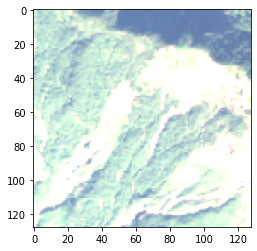

In [19]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])

NDVI can be calculated from red band and nir as follows.

data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

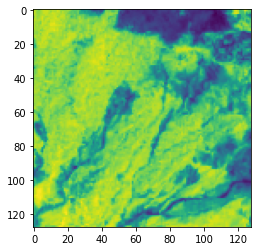

In [20]:
data_red = data[:, :, 3]
data_green = data[:, :, 2]
data_blue = data[:, :, 1]
data_nir = data[:, :, 7]
data_rgb = data[:, :, 3:0:-1]
data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
f_data[0, :, :, 0] =data_ndvi
f_data[0, :, :, 1] = data[:, :, 12]
f_data[0, :, :, 2] = data[:, :, 13]

print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
plt.imshow(data_ndvi)
plt.imshow

In [21]:
data.shape

(128, 128, 14)

The mask or output label signifies if a landslide has occured or not. The colored region in the mask (label) depictis the area of landslide. This information is pre-annotated.

The dimention of the mask is just an image of size 128x128 pixels.

ls ['mask']
input data shape: (128, 128)


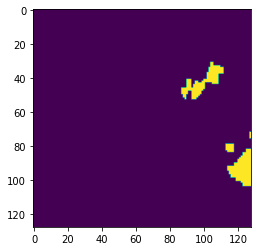

In [22]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

Now loading all of the dataset and dividing it into 3 parts i.e Training, Testing and Validation parts.

In [23]:
# Input data path
data_path = r'TrainData/img/*.h5'
data_mask = r'TrainData/mask/*.h5'

# Initializing empty numpy arrays for storing our extracted input data
data_array = np.zeros((3799, 128, 128, 6))
mask_array = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(data_path))
all_mask = sorted(glob.glob(data_mask))

We further normalize the data to be in the range -1 to 1.

In [ ]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # make any nan values zero
        data[np.isnan(data)] = 0.0

        # normalizing the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))

        # final data array after normalization

        data_array[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        data_array[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        data_array[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        data_array[i, :, :, 3] = data_ndvi #NDVI
        data_array[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        data_array[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

    # Loading the mask files
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        mask_array[i, :, :, 0] = data

In [25]:
# checking to see if the data is in our normalized range or not
data_array[np.isnan(data_array)] = 0.00000
print(data_array.min(), data_array.max(), mask_array.min(), mask_array.max())

-1.0 1.0 0.0 1.0


Plotting our data for a random image sample.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


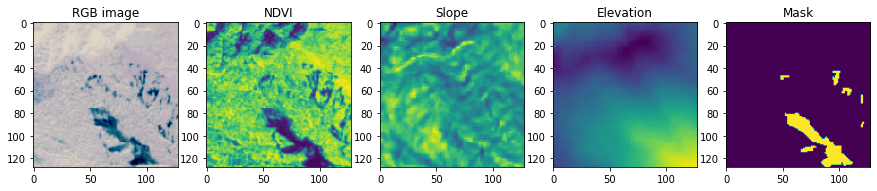

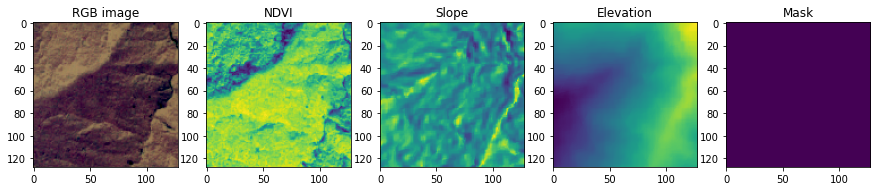

In [26]:
img=237
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))
ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(data_array[img, :, :, 0:3])
ax2.imshow(data_array[img, :, :, 3])
ax3.imshow(data_array[img, :, :, 4])
ax4.imshow(data_array[img, :, :, 5])
ax5.imshow(mask_array[img, :, :, 0])

img=251
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))
ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(data_array[img, :, :, 0:3])
ax2.imshow(data_array[img, :, :, 3])
ax3.imshow(data_array[img, :, :, 4])
ax4.imshow(data_array[img, :, :, 5])
ax5.imshow(mask_array[img, :, :, 0])

### splitting dataset

In [27]:
# import sklearn
from sklearn.model_selection import train_test_split

# Split the data into train, test sets
X_train, x_test, Y_train, y_test = train_test_split(data_array, mask_array, test_size=0.2, shuffle= True)

# Split the data into train, validation sets
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.2, shuffle= True)


In [28]:
x_train.shape, y_train.shape

((2431, 128, 128, 6), (2431, 128, 128, 1))

In [30]:
x_valid.shape, y_valid.shape

((608, 128, 128, 6), (608, 128, 128, 1))

In [31]:
x_test.shape, y_test.shape

((760, 128, 128, 6), (760, 128, 128, 1))

### model unet

In [37]:
# from utils import recall_m, precision_m, f1_m
def unet_model(width, height, channels):
    inputs = tf.keras.layers.Input((width, height, channels))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)
    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model

In [38]:
model = unet_model(128, 128, 6)
model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    # earlyStopping,
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=16,  
          epochs=20, 
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("model_save.h5")

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 6  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 128, 128, 16  880         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_18 (Dropout)           (None, 128, 128, 16  0           ['conv2d_38[0][0]']              
                                )                                                           

2022-08-01 09:38:59.698305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-01 09:39:11.823239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_f1_m improved from -inf to 0.56796, saving model to best_model.h5
152/152 - 14s - loss: 0.0731 - accuracy: 0.9771 - f1_m: 0.1549 - precision_m: 0.4728 - recall_m: 0.1171 - val_loss: 0.0470 - val_accuracy: 0.9815 - val_f1_m: 0.5680 - val_precision_m: 0.6358 - val_recall_m: 0.5370 - 14s/epoch - 94ms/step
Epoch 2/20

Epoch 2: val_f1_m improved from 0.56796 to 0.60247, saving model to best_model.h5
152/152 - 11s - loss: 0.0447 - accuracy: 0.9836 - f1_m: 0.5712 - precision_m: 0.7023 - recall_m: 0.5086 - val_loss: 0.0411 - val_accuracy: 0.9852 - val_f1_m: 0.6025 - val_precision_m: 0.7317 - val_recall_m: 0.5213 - 11s/epoch - 72ms/step
Epoch 3/20

Epoch 3: val_f1_m improved from 0.60247 to 0.61651, saving model to best_model.h5
152/152 - 11s - loss: 0.0407 - accuracy: 0.9848 - f1_m: 0.6048 - precision_m: 0.7444 - recall_m: 0.5309 - val_loss: 0.0376 - val_accuracy: 0.9861 - val_f1_m: 0.6165 - val_precision_m: 0.7669 - val_recall_m: 0.5223 - 11s/epoch - 73ms/step
Epoch 4/20

Epoch 

In [39]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)


2022-08-01 09:42:35.996064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.031594518572092056 0.9878726005554199 0.6833469867706299 0.806555986404419 0.5994647145271301


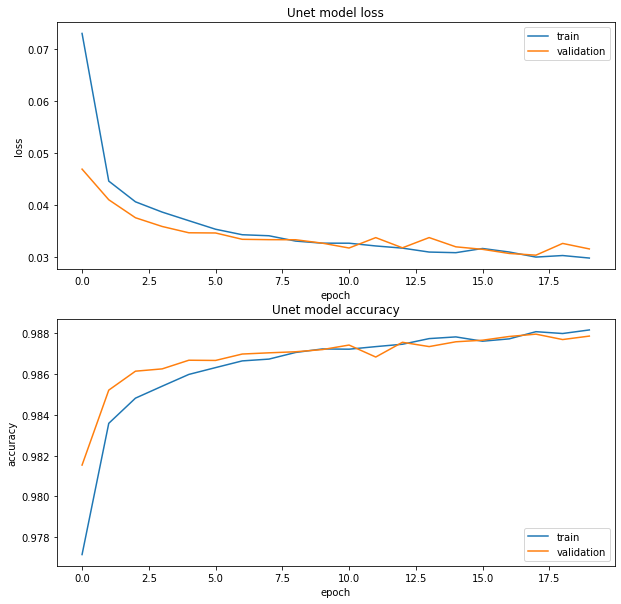

In [40]:
fig,((ax11,ax12)) = plt.subplots(2,1,figsize=(10,10))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper right')

ax12.plot(history.history['accuracy'])
ax12.plot(history.history['val_accuracy'])
ax12.set_title('Unet model accuracy')
ax12.set_ylabel('accuracy')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='lower right')


### test

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
threshold = 0.5
pred_img_test = model.predict(x_test)
pred_img_test = (pred_img_test > threshold).astype(np.uint8)

2022-08-01 09:42:49.832430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 42ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

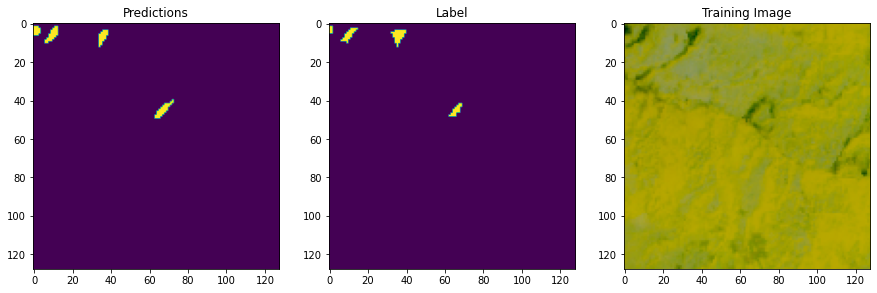

In [43]:
img = 145
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img_test[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_test[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_test[img, :, :, 1:4])
ax3.set_title('Training Image')

In [44]:
intersection = np.logical_and(y_test, pred_img_test)
union = np.logical_or(y_test, pred_img_test)
iou_score = np.sum(intersection) / np.sum(union)
print('IoU is %s' % iou_score)

IoU is 0.5291909687585188


In [45]:
y_test = y_test.astype("float32")
pred_img_test = pred_img_test.astype('float32')

In [46]:
recall_test = recall_m(y_test, pred_img_test)
precision_test = precision_m(y_test, pred_img_test)
f1_test = f1_m(y_test, pred_img_test)
iou_test = iou_m(y_test, pred_img_test)

In [47]:
print('recall: {} \n presision: {} \n f1: {} \n IoU: {} '.format(recall_test,precision_test,f1_test,iou_test))

recall: 0.6084635257720947 
 presision: 0.8024438619613647 
 f1: 0.6921188831329346 
 IoU: 0.5291909687585188 
